In this project, I do a brute force approach to this problem. I do some general EDA however, since there are multiple categorical values, theres not much to work with, in my opnion at least.

In [113]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal





from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import ks_2samp
import utilities
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix


from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline






df = pd.read_csv('/Users/mimi/Desktop/PYTHON/TURING/HOME/MachLearning/S1/data/TravelInsurancePrediction.csv')
df.drop(columns='Unnamed: 0', inplace=True)

new_bucket_ranges = [0, 125000, 250000, 375000, 500000, 625000, 750000, 875000, 1000000, 1125000, 1250000, 1375000, 1500000, 1575000, 1650000, 1725000, 1800000]
new_bucket_labels = ['0 - 125K', '125K - 250K', '250K - 375K', '375K - 500K', '500K - 625K', '625K - 750K', '750K - 875K', '875K - 1M', '1M - 1.125M', '1.125M - 1.25M', '1.25M - 1.375M', '1.375M - 1.5M', '1.5M - 1.575M', '1.575M - 1.65M', '1.65M - 1.725M', '1.725M - 1.8M']

df['Age'] = df['Age'].astype(int)
df['IncomeBucket'] = pd.cut(df['AnnualIncome'], bins=new_bucket_ranges, labels=new_bucket_labels)
df['Employment Type'] = df['Employment Type'].str.split().str[0]
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeBucket
0,31,Government,Yes,400000,6,1,No,No,0,375K - 500K
1,31,Private,Yes,1250000,7,0,No,No,0,1.125M - 1.25M
2,34,Private,Yes,500000,4,1,No,No,1,375K - 500K
3,28,Private,Yes,700000,3,1,No,No,0,625K - 750K
4,28,Private,Yes,700000,8,1,Yes,No,0,625K - 750K


# EDA

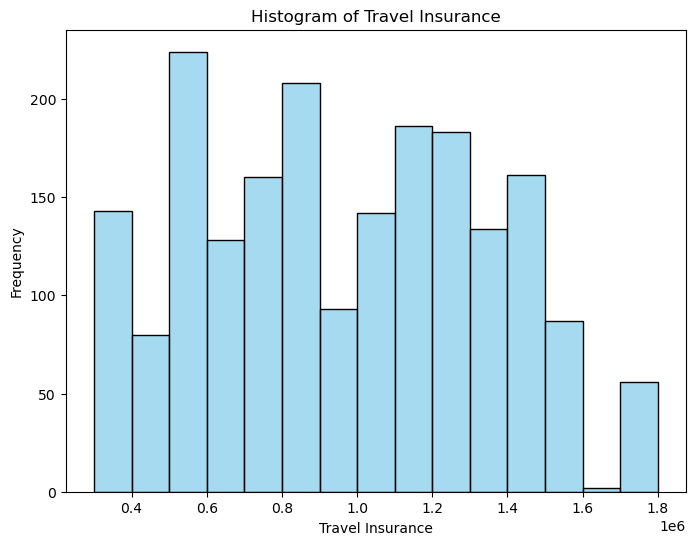

In [2]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AnnualIncome'], kde=False, color='skyblue')
plt.title('Histogram of Travel Insurance')
plt.xlabel('Travel Insurance')
plt.ylabel('Frequency')
plt.show()

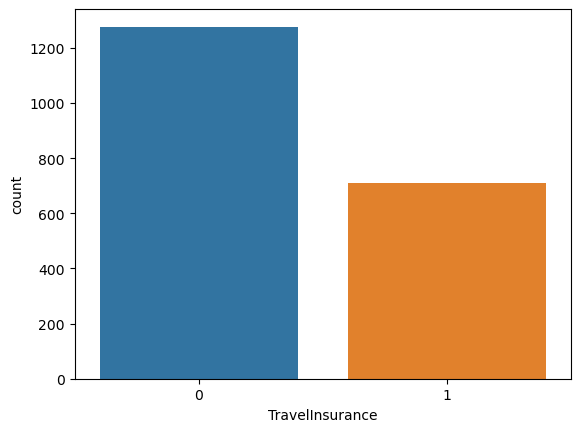

In [3]:

sns.countplot(data = df, x = 'TravelInsurance')
plt.show()

great, an imbalanced dataset!

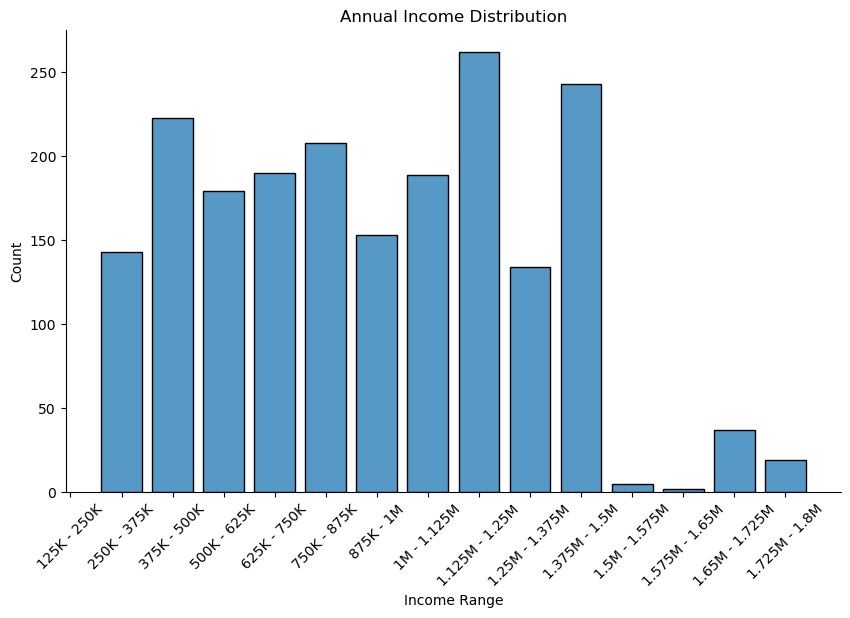

In [4]:
new_bucket_ranges = [0, 125000, 250000, 375000, 500000, 625000, 750000, 875000, 1000000, 1125000, 1250000, 1375000, 1500000, 1575000, 1650000, 1725000, 1800000]
new_bucket_labels = ['0 - 125K', '125K - 250K', '250K - 375K', '375K - 500K', '500K - 625K', '625K - 750K', '750K - 875K', '875K - 1M', '1M - 1.125M', '1.125M - 1.25M', '1.25M - 1.375M', '1.375M - 1.5M', '1.5M - 1.575M', '1.575M - 1.65M', '1.65M - 1.725M', '1.725M - 1.8M']


df['IncomeBucket'] = pd.cut(df['AnnualIncome'], bins=new_bucket_ranges, labels=new_bucket_labels)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='IncomeBucket', discrete=True, shrink=0.8)
plt.title('Annual Income Distribution')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
sns.despine()
plt.show()

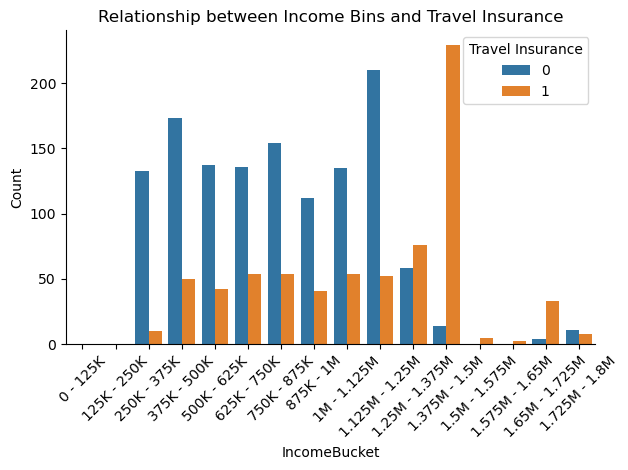

In [5]:
sns.countplot(x='IncomeBucket', hue='TravelInsurance', data=df)
plt.xlabel('IncomeBucket')
plt.ylabel('Count')
plt.title('Relationship between Income Bins and Travel Insurance')
plt.xticks(rotation=45)
plt.legend(title='Travel Insurance', loc='upper right')
plt.tight_layout()
sns.despine()
plt.show()

In [6]:
df.shape

(1987, 10)

In [7]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
IncomeBucket           0
dtype: int64

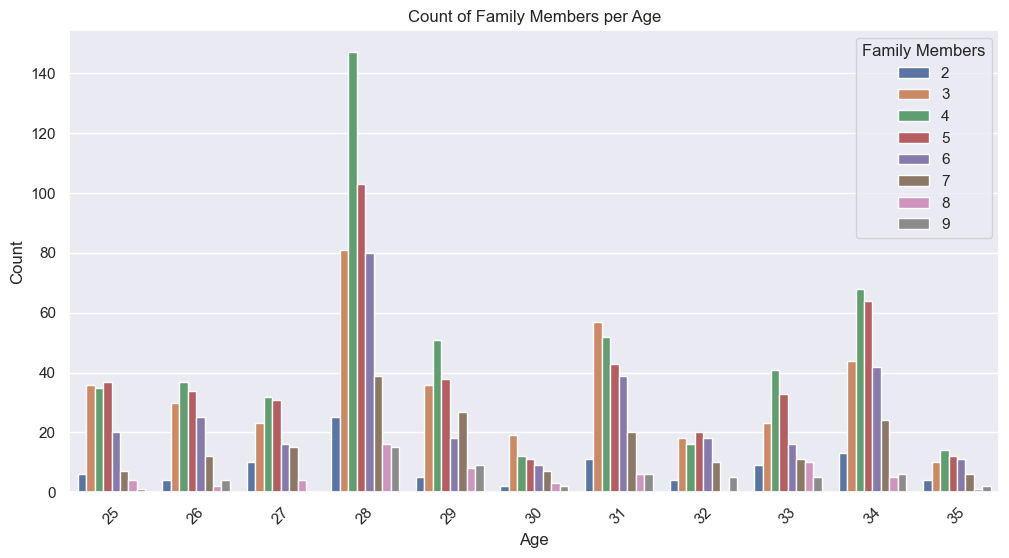

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

color = (sns.dark_palette("purple"))
sns.set()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age', hue='FamilyMembers')


plt.title('Count of Family Members per Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Family Members')
plt.xticks(rotation=45)


plt.show()


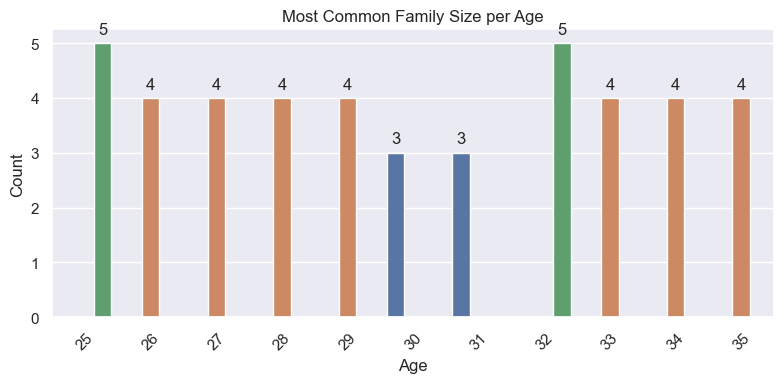

In [9]:



family_counts = df.groupby('Age')['FamilyMembers'].agg(lambda x: x.value_counts().idxmax()).reset_index()


plt.figure(figsize=(8, 4))
barplot = sns.barplot(data=family_counts, x='Age', y='FamilyMembers', hue='FamilyMembers')
plt.title('Most Common Family Size per Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend('', frameon=False)



for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()


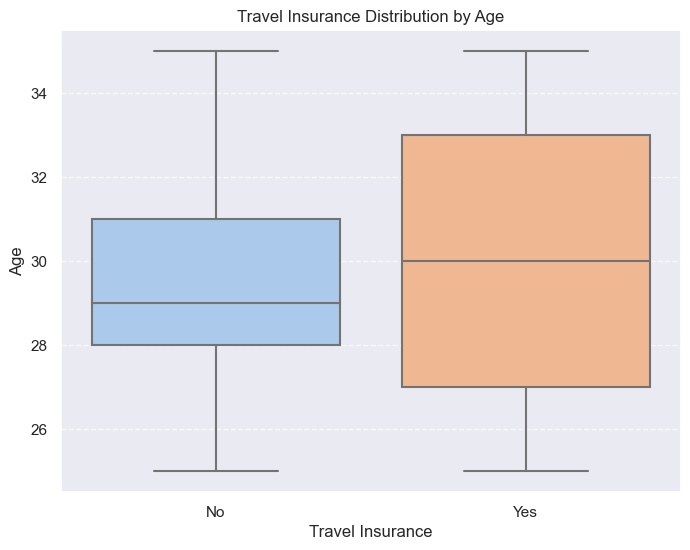

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TravelInsurance', y='Age', palette='pastel')
plt.title('Travel Insurance Distribution by Age')
plt.xlabel('Travel Insurance')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

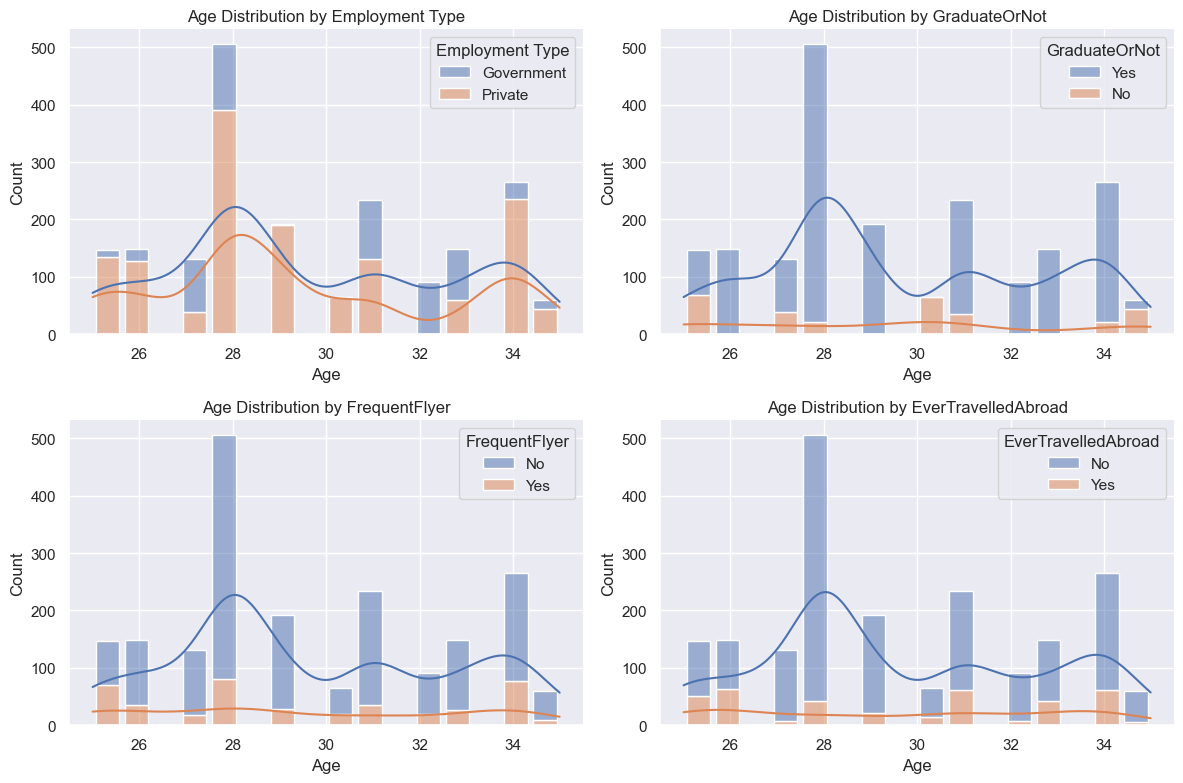

In [11]:


object_cols = df.select_dtypes(include=['object']).columns
object_df = df[object_cols].copy()  
object_df['Age'] = df['Age']  


fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()


for i, col in enumerate(object_cols):
    sns.histplot(data=object_df, x='Age', hue=col, multiple='stack', shrink=0.8, kde=True, ax=axes[i])
    axes[i].set_title(f'Age Distribution by {col}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Count')


plt.tight_layout()
sns.despine()

plt.show()

The clear imbalance means that most features will hinder the learning process

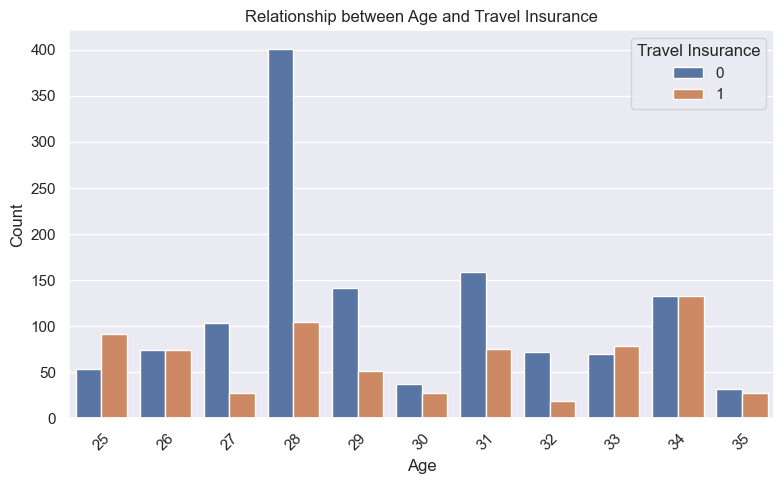

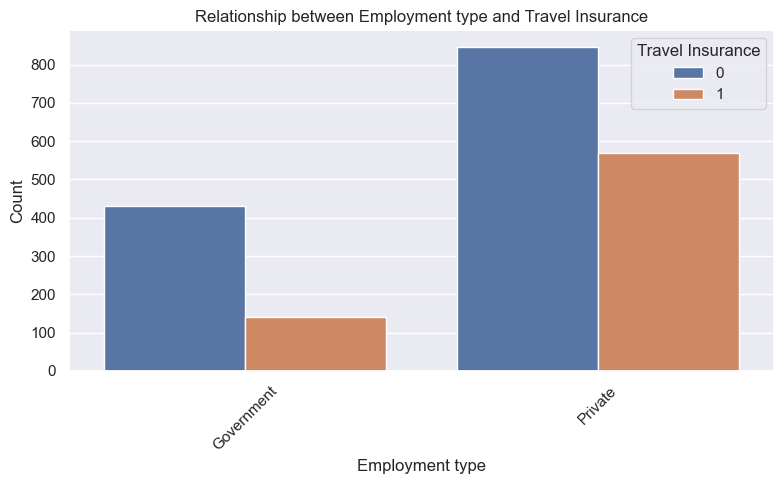

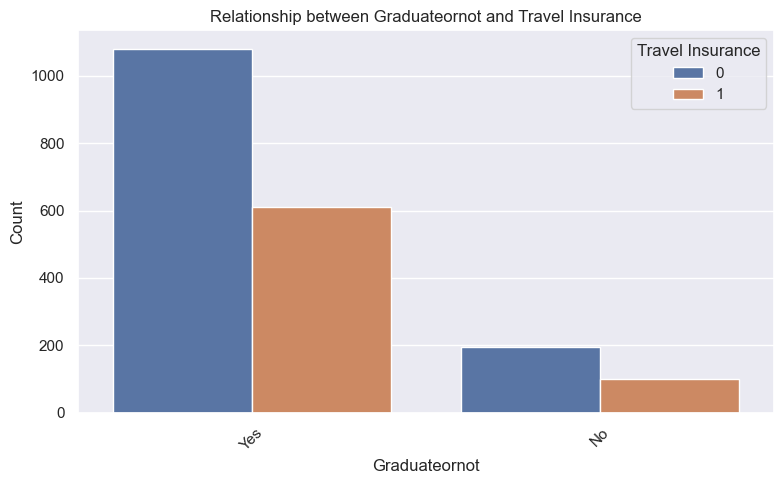

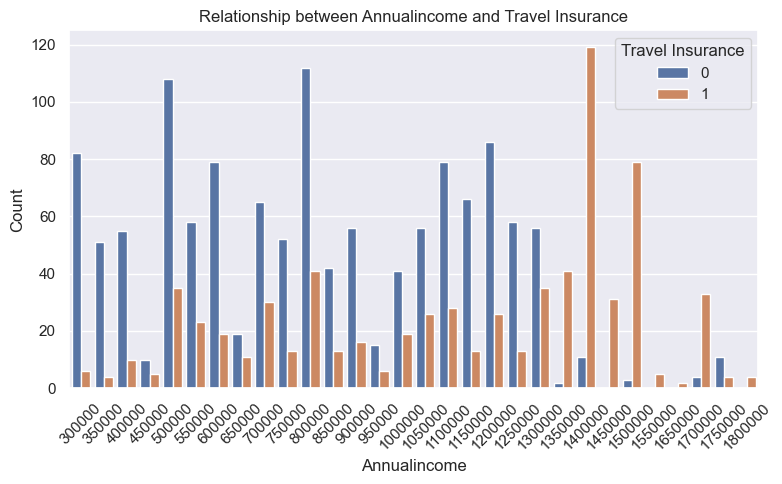

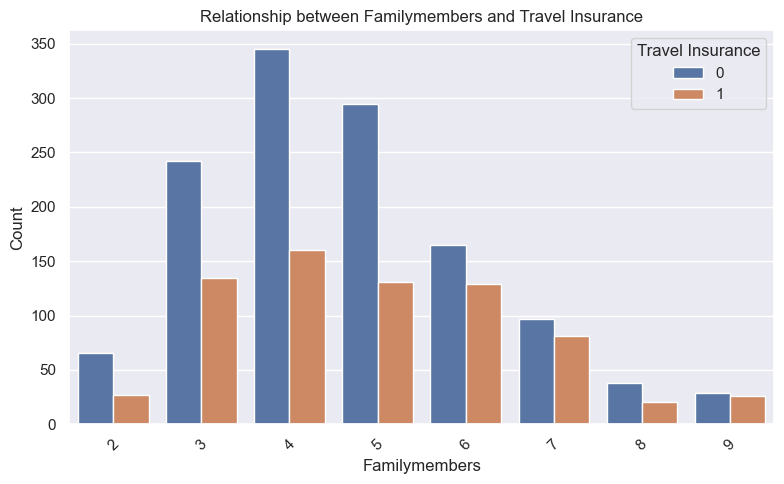

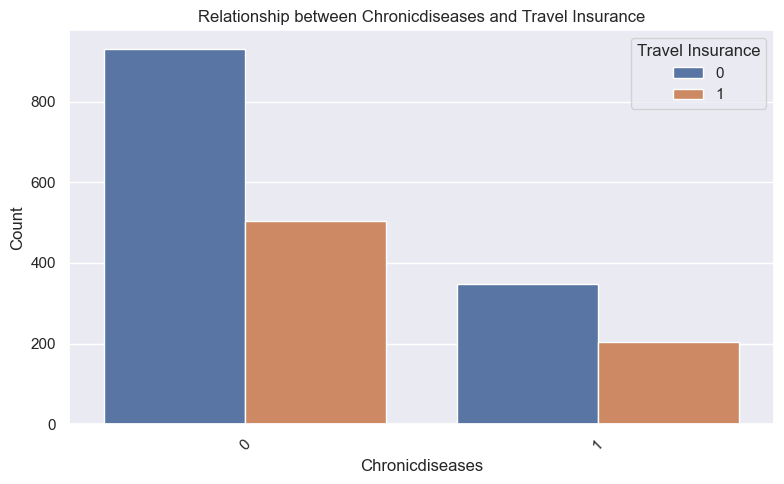

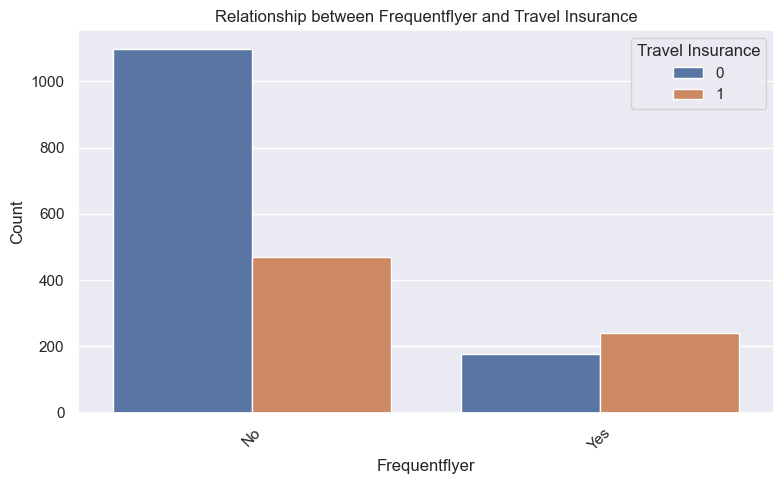

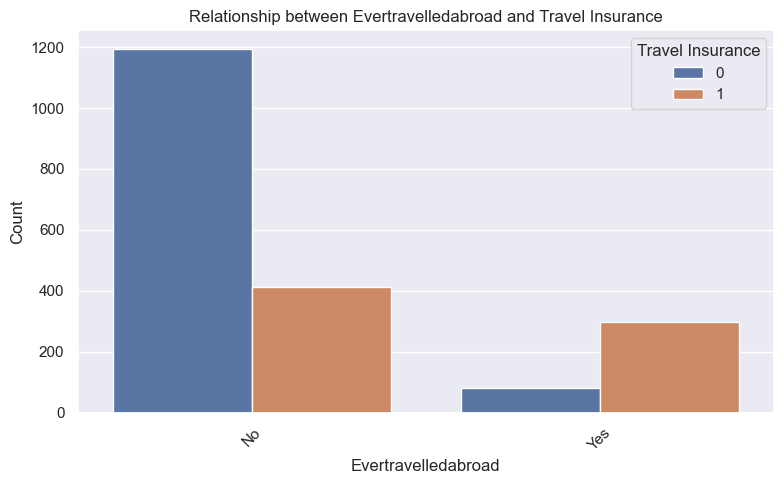

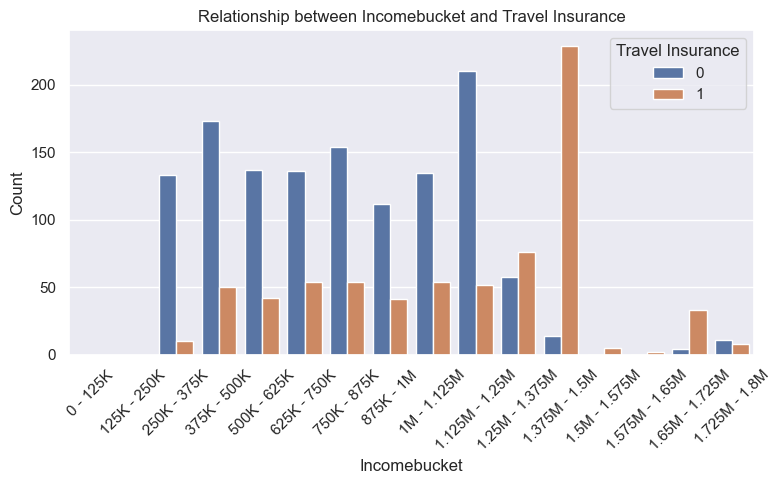

In [12]:
df['Age'] = df['Age'].astype('category')

variables = df.columns[df.columns != 'TravelInsurance']

for variable in variables:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=variable, hue='TravelInsurance', data=df)
    plt.xlabel(variable.capitalize())
    plt.ylabel('Count')
    plt.title(f'Relationship between {variable.capitalize()} and Travel Insurance')
    plt.xticks(rotation=45)
    plt.legend(title='Travel Insurance', loc='upper right')
    plt.tight_layout()
    plt.show()

From all these graphs, some details that stick out:

Those who have traveled abroad, and frequent flyers, tend to purchase more travel insurance than those who dont (travel or frequent fliers). This represents an opportunity to sell more to those who dont regurlaly purchase travel insurance. Also the imabalanced trend continues, thus further affecting the learning process.

# Baseline Model

## pre-final prep

/var/folders/k1/1bd5lx_d219gy8hl39z8vwx80000gn/T/ipykernel_31736/1464693508.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop(columns='IncomeBucket').corr()


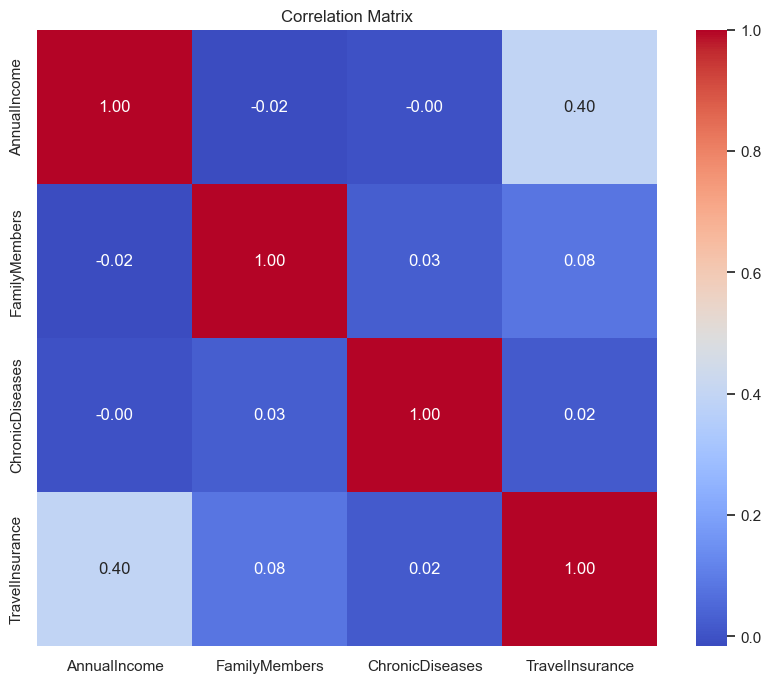

In [13]:
correlation_matrix = df.drop(columns='IncomeBucket').corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

no highly correlated variables nor any multicolinearity.

In [14]:
df['Age'] = df['Age'].astype(int)
X = df.drop(columns=['IncomeBucket', 'TravelInsurance'])
Y = df['TravelInsurance']
column_names = X.columns  

num_cols = ['AnnualIncome']
cat_cols = [col for col in X.columns if X[col].dtype == 'object']

num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

X_processed = preprocessor.fit_transform(X)

transformed_column_names = list(num_cols) + \
                           list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols))

X_processed_df = pd.DataFrame(X_processed, columns=transformed_column_names)

print(X_processed_df.head())

   AnnualIncome  Employment Type_Government  Employment Type_Private  \
0      0.066667                         1.0                      0.0   
1      0.633333                         0.0                      1.0   
2      0.133333                         0.0                      1.0   
3      0.266667                         0.0                      1.0   
4      0.266667                         0.0                      1.0   

   GraduateOrNot_No  GraduateOrNot_Yes  FrequentFlyer_No  FrequentFlyer_Yes  \
0               0.0                1.0               1.0                0.0   
1               0.0                1.0               1.0                0.0   
2               0.0                1.0               1.0                0.0   
3               0.0                1.0               1.0                0.0   
4               0.0                1.0               0.0                1.0   

   EverTravelledAbroad_No  EverTravelledAbroad_Yes  
0                     1.0              

## Split data

In [15]:
n_splits = 5  
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_processed_df, Y)):
    X_train, X_test = X_processed_df.iloc[train_index], X_processed_df.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(1590, 9)
(397, 9)
(1590,)
(1590,)


## LogReg

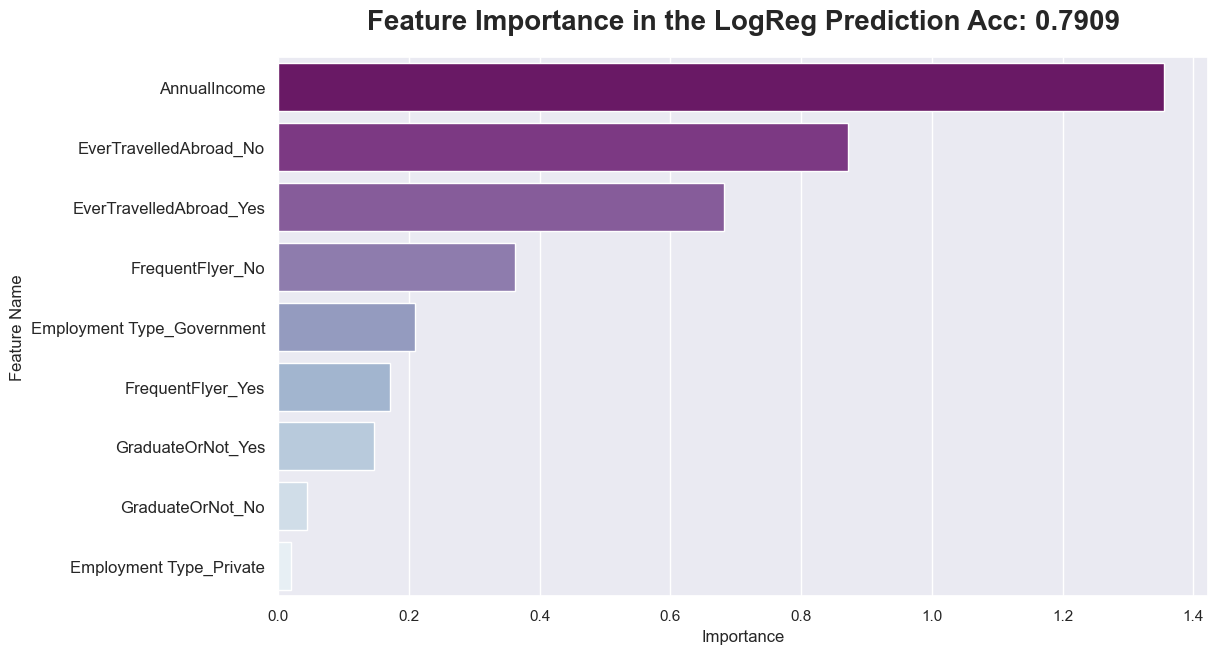

In [17]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid.fit(X_train, y_train)

logisticRegr = LogisticRegression(solver='liblinear', **grid.best_params_)
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
y_train_pred = logisticRegr.predict(X_train)
y_test_pred = logisticRegr.predict(X_test)
lr_accuracy = logisticRegr.score(X_test, y_test)

coefficients = logisticRegr.coef_[0]
imp_df = pd.DataFrame({"Feature Name":X_train.columns,
                       "Importance":np.abs(coefficients)})
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="BuPu_r")
plt.title(f"Feature Importance in the LogReg Prediction Acc: {lr_accuracy:.4f}", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

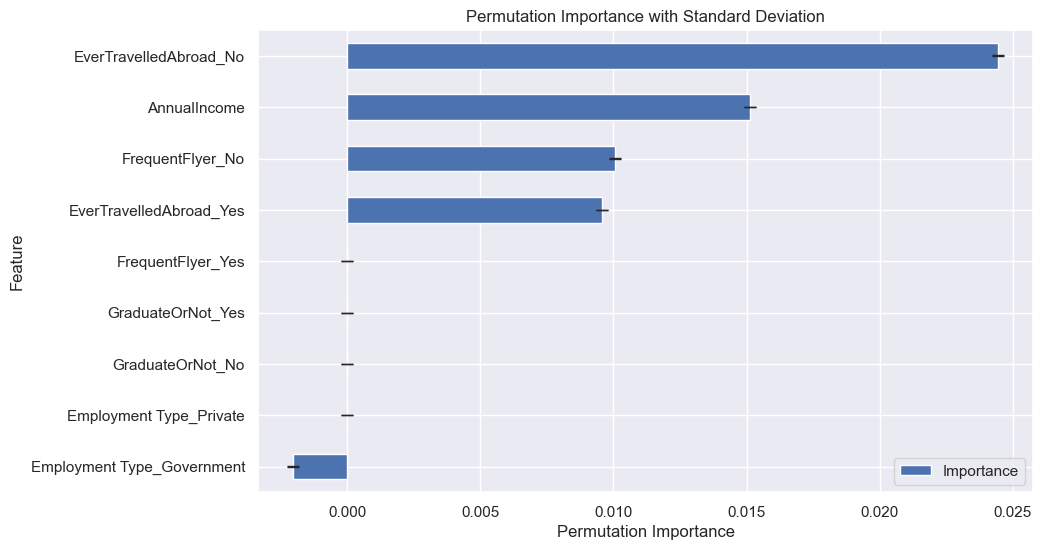

In [18]:
result = permutation_importance(logisticRegr, X_test, y_test, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': X_processed_df.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

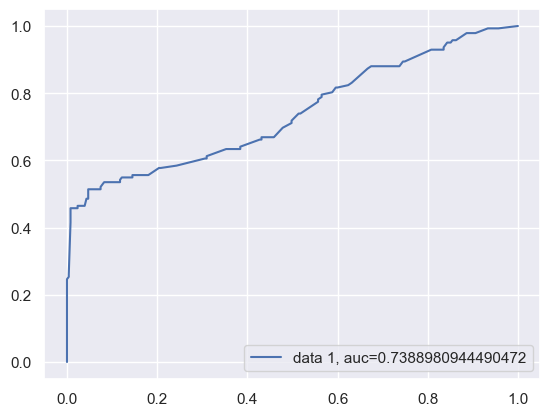

In [19]:
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## The rest

ive never done this before, looks like fun

In [20]:


clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier()
    
}

In [21]:
f1_scores = dict()
for clf_name in clfs:
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_scores[clf_name] = f1_score(y_pred, y_test)
f1_scores

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'mnb': 0.5923076923076924,
 'gnb': 0.582089552238806,
 'svm1': 0.6063348416289593,
 'svm2': 0.6375545851528384,
 'svm3': 0.5615384615384614,
 'mlp1': 0.6347826086956522,
 'mlp2': 0.6548672566371682,
 'ada': 0.6604651162790698,
 'dtc': 0.6666666666666666,
 'rfc': 0.6666666666666666,
 'gbc': 0.6575342465753424}

## rfc

In [40]:
param_grid = {
   'max_depth': range(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': range(1, 5),
    'min_samples_split': range(2, 5),
    'n_estimators': [100, 200, 300]
}


rf_classifier = RandomForestClassifier()


grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_


best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)


y_pred_best = best_rf_classifier.predict(X_test)


accuracy_best = (y_pred_best == y_test).sum() / len(y_test)

print("Best parameters:", best_params)
print("Best score:", best_score)
print("Accuracy of the Random Forest Classifier with best parameters:", accuracy_best)

Best parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}
Best score: 0.7861635220125787
Accuracy of the Random Forest Classifier with best parameters: 0.8136020151133502


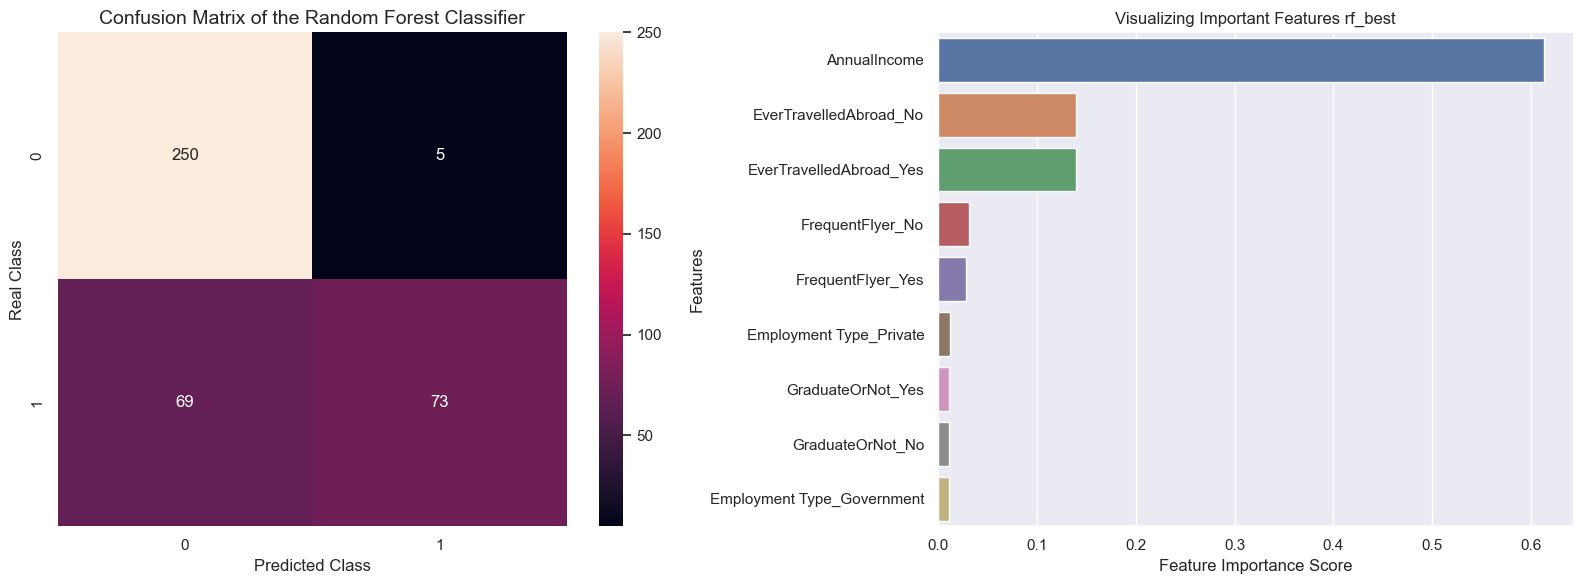

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_best)
sns.heatmap(conf_mat, annot=True, fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix of the Random Forest Classifier', fontsize=14)
axes[0].set_ylabel('Real Class', fontsize=12)
axes[0].set_xlabel('Predicted Class', fontsize=12)


feature_scores = pd.Series(best_rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_scores, y=feature_scores.index, ax=axes[1])
axes[1].set_xlabel('Feature Importance Score')
axes[1].set_ylabel('Features')
axes[1].set_title("Visualizing Important Features rf_best")


plt.tight_layout()


plt.show()

## GB

In [42]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

gb_clf = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)

best_gb_clf = grid_search.best_estimator_

y_pred = best_gb_clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.7836477987421384
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       255
           1       0.95      0.51      0.67       142

    accuracy                           0.82       397
   macro avg       0.87      0.75      0.77       397
weighted avg       0.84      0.82      0.80       397



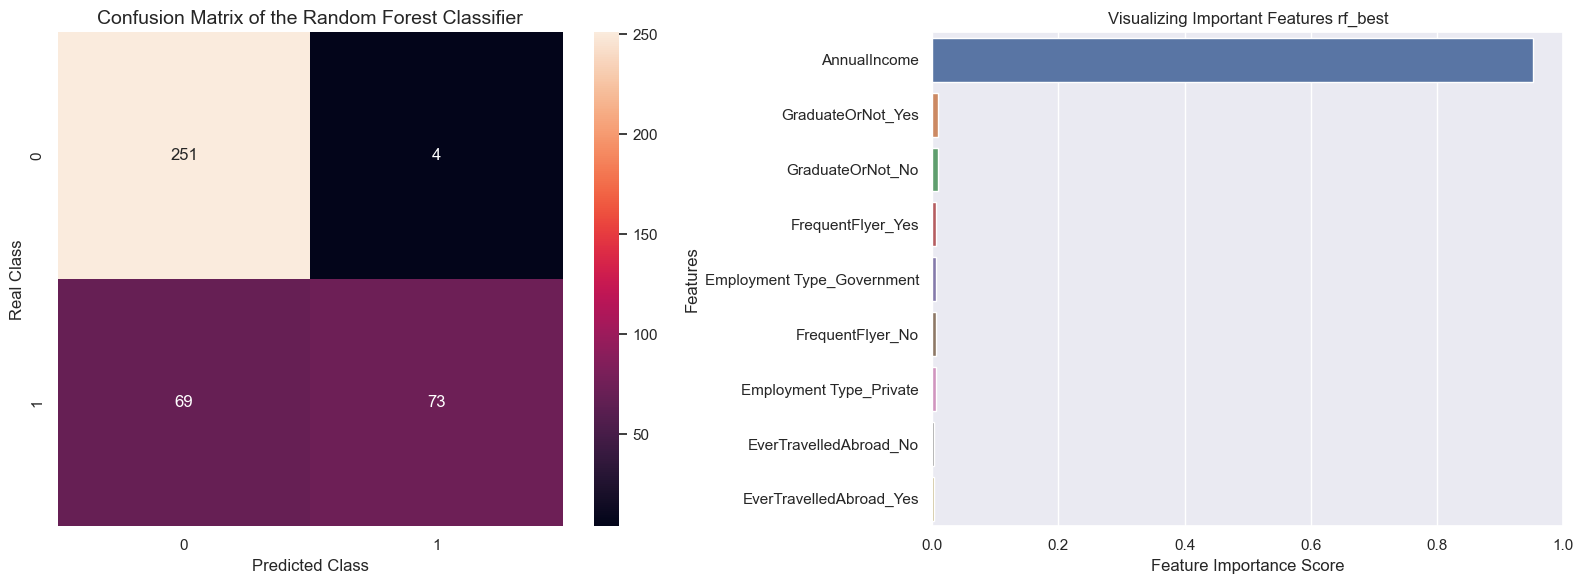

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix of the Random Forest Classifier', fontsize=14)
axes[0].set_ylabel('Real Class', fontsize=12)
axes[0].set_xlabel('Predicted Class', fontsize=12)


feature_scores = pd.Series(best_gb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_scores, y=feature_scores.index, ax=axes[1])
axes[1].set_xlabel('Feature Importance Score')
axes[1].set_ylabel('Features')
axes[1].set_title("Visualizing Important Features rf_best")


plt.tight_layout()


plt.show()

# Statistical Inference

Null Hypothesis =  theres no difference between TravelInsurance and no-TravelInsurance
Alternate Hypothesis = Theres a difference


In [45]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        
        df[column] = label_encoder.fit_transform(df[column])
        

df.dtypes


Age                       int64
Employment Type           int64
GraduateOrNot             int64
AnnualIncome              int64
FamilyMembers             int64
ChronicDiseases           int64
FrequentFlyer             int64
EverTravelledAbroad       int64
TravelInsurance           int64
IncomeBucket           category
dtype: object

In [48]:
spam = df[df['TravelInsurance'] == 0].drop(columns=['IncomeBucket'])

ham = df[df['TravelInsurance'] == 1].drop(columns=['IncomeBucket'])



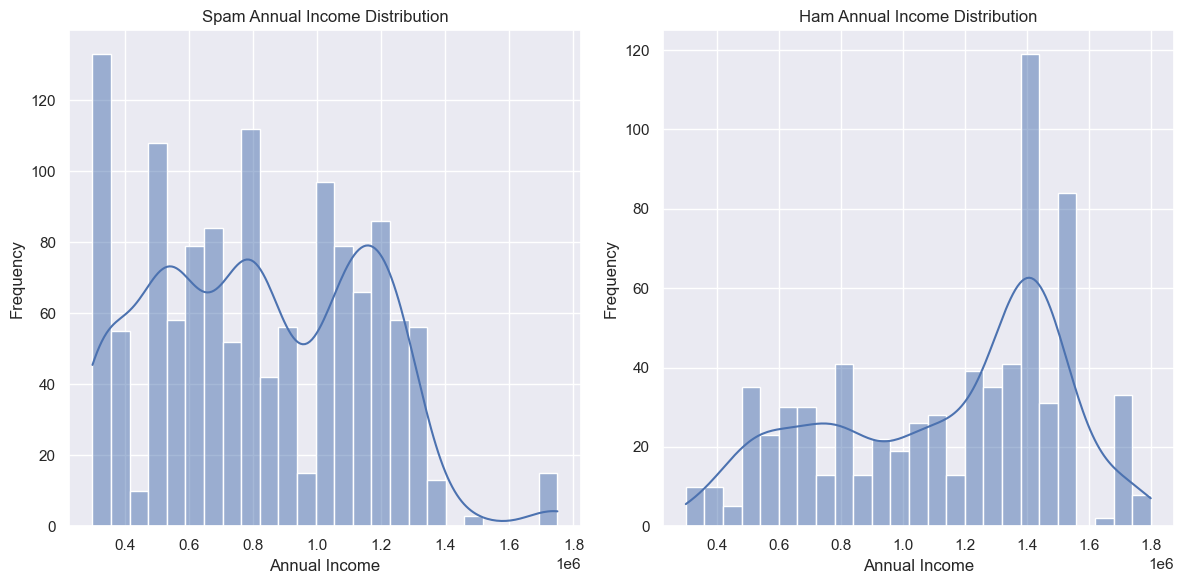

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(spam['AnnualIncome'], bins=25, kde=True, ax=axs[0])
axs[0].set_title('Spam Annual Income Distribution')
axs[0].set_xlabel('Annual Income')
axs[0].set_ylabel('Frequency')

sns.histplot(ham['AnnualIncome'], bins=25, kde=True, ax=axs[1])
axs[1].set_title('Ham Annual Income Distribution')
axs[1].set_xlabel('Annual Income')
axs[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

not normally distributed, but lets double check

## Gaussian Checks

Main obejctive of performing Normality Tests is to validate the Gaussian distribution of data.

Shapiro-Wilk Test


Assumption:

Observations in each sample are independent and distributed identically.

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

In [71]:
data1 = spam['AnnualIncome']
data2 = ham['AnnualIncome']

In [72]:
stat, p = shapiro(data1)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.957, p=0.957
Probably not Gaussian


In [73]:
stat, p = shapiro(data2)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.926, p=0.926
Probably not Gaussian


D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution.
Assumption
Observations in each sample are independent and distributed identically.
Hypothesis
H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.


In [74]:
stat, p = normaltest(data1)
print('stat={0:.3f}, p={0:.3g}'.format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=108.807, p=109
Probably not Gaussian


In [75]:
stat, p = normaltest(data2)
print('stat={0:.3f}, p={0:.3g}'.format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=152.747, p=153
Probably not Gaussian


Anderson-Darling Test



Tests whether a data sample has a Gaussian distribution.


Assumption


Observations in each sample are independent and distributed identically.


Hypothesis
H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

In [80]:
result = anderson(data1)
print('stat={0:.3g}'.format(result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))


stat=15.8
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [81]:
result = anderson(data2)
print('stat={0:.3g}'.format(result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))


stat=21.7
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


## Correlation tests

Pearson’s Correlation Coefficient


Tests whether a data sample is linearly separable.



Assumption

a) Observations in each sample are independent and distributed identically.


b) Observations are normally distributed.


c) Similar variance between independent variables


Hypothesis


H0: the samples are correlated.
H1: the sample does not have any correlation.



In [88]:
stat, p = pearsonr(data1[:len(data2)], data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.017, p=-0.017
Probably independent


Spearman’s Rank Correlation


Tests whether a data sample is montonically separable.



Assumption


a) Observations in each sample are independent and distributed identically.


b) Observations in each sample are ranked .




Hypothesis
H0: the samples are correlated.
H1: the sample does not have any correlation.

In [92]:
from scipy.stats import spearmanr

stat, p = spearmanr(data1[:len(data2)], data2)
print('stat={0:.3g}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


stat=-0.0161, p=-0.016
Probably independent


Kendall’s Rank Correlation



Tests whether a data sample is montonically separable.
Assumption




a) Observations in each sample are independent and distributed identically.


b) Observations in each sample are ranked .


Hypothesis


H0: the samples are correlated.


H1: the sample does not have any correlation.

In [94]:
stat, p = kendalltau(data1[:len(data2)], data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.011, p=-0.011
Probably independent


## Non Parametric Test

Mann-Whitney U Test


Distribution of two data samples are equal or not.
Assumption



a)Each data sample's observation are independent and distributed.


b)Observations in each data samples can be ranked.


Hypothesis
H0: the distribution of two samples are equal .
H1: the distribution of two samples are not equal.

In [105]:
stat, p = mannwhitneyu(data1, data2)
print('stat={0:.3g}, p={0:.3g}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=2.36e+05, p=2.36e+05
Probably different distributions


Wilcoxon Signed-Rank Test


Distribution between two paired samples are significantly equal or not.
Assumption


a)Each data sample's observation are independent and distributed.


b)Observations can be ranked.


c)Observations are paired.



Hypothesis
H0: the distribution of two samples are equal .
H1: the distribution of two samples are not equal.



In [108]:
stat, p = wilcoxon(data1[:len(data2)], data2)
print('stat={0:.3g}, p={0:.3g}' .format (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=4.73e+04, p=4.73e+04
Probably different distributions


Kruskal-Wallis H Test


Distribution between two independent samples are significantly equal or not.


Assumption
a)Each data sample's observation are independent and distributed.


b)Observations can be ranked.


Hypothesis
H0: the distribution of samples are equal .
H1: the distribution of samples are not equal.

In [110]:
stat, p = kruskal(data1, data2)
print('stat={0:.3g}, p={0:.3g}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


stat=314, p=314
Probably different distributions


In conclusion, both samples have different distributions.

# Links

In [77]:
'''
https://www.kaggle.com/code/sid3945/classifying-ortho-patients-randomforestclassifier
https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial#3.-Assumptions-of-Logistic-Regression-
https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
https://www.kaggle.com/competitions/titanic/discussion/262100
https://www.kaggle.com/code/pavansanagapati/automated-hyperparameter-tuning
https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

https://ethanweed.github.io/pythonbook/05.02-ttest.html
https://www.kaggle.com/code/shashwatwork/guide-to-statistical-hypothesis-tests-in-python


'''

'\nhttps://www.kaggle.com/code/sid3945/classifying-ortho-patients-randomforestclassifier\nhttps://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial#3.-Assumptions-of-Logistic-Regression-\nhttps://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial\nhttps://www.kaggle.com/competitions/titanic/discussion/262100\nhttps://www.kaggle.com/code/pavansanagapati/automated-hyperparameter-tuning\nhttps://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/\n\nhttps://ethanweed.github.io/pythonbook/05.02-ttest.html\nhttps://www.kaggle.com/code/shashwatwork/guide-to-statistical-hypothesis-tests-in-python\n\n\n'